In [2]:
cd dataset

C:\Users\Miya\Desktop\cna\dataset


In [3]:
ls

 Volume in drive C is OS
 Volume Serial Number is C803-CD91

 Directory of C:\Users\Miya\Desktop\cna\dataset

07/10/2017  06:27 PM    <DIR>          .
07/10/2017  06:27 PM    <DIR>          ..
07/10/2017  06:27 PM         6,204,650 repo_07.csv
07/10/2017  06:27 PM         5,887,066 repo_08.csv
07/10/2017  06:27 PM         6,312,453 repo_09.csv
07/10/2017  06:27 PM            57,807 repo_big.csv
07/10/2017  06:27 PM         8,997,970 Repo_matrix.csv
07/10/2017  06:27 PM         4,374,489 Repositories.csv
07/10/2017  06:27 PM         3,676,746 repositories_refined.csv
               7 File(s)     35,511,181 bytes
               2 Dir(s)  68,205,592,576 bytes free


In [164]:
import pandas as pd
data = pd.read_csv('repositories_refined.csv',parse_dates=['Month, Day, Year of Date'])
#data = data[data['Coding Effort']!=0]

In [165]:
len(data)

172354

In [168]:
data.sort_values(by = ['Month, Day, Year of Date','Worker_refined']).head()

,Worker_refined,repo_refined,Coding Effort,"Month, Day, Year of Date"
0,aaa,AAA,0.0,2015-07-01
557,aah,KNU,0.0,2015-07-01
2231,aaj,NLY,0.0,2015-07-01
2183,aaq,LZH,5.0,2015-07-01
1082,aau,MUT,5.0,2015-07-01


In [14]:
len(data)

172354

In [48]:
len(data['Worker_refined'].unique())

2459

In [49]:
len(data['repo_refined'].unique())

1496

In [10]:
len(data['Month, Day, Year of Date'].unique())

92

In [24]:
len(set(list(map(lambda x:x.isocalendar()[1],data['Month, Day, Year of Date']))))

14

In [28]:
data = data[data['Coding Effort']!=0]

In [26]:
data_origin = pd.read_csv('Repositories.csv')

In [27]:
len(data_origin)

172354

In [171]:
data.groupby(['Worker_refined','repo_refined']).sum().count()

Coding Effort    6414
dtype: int64

In [116]:
data.groupby(['Worker_refined','repo_refined','Month, Day, Year of Date']).sum()

Coding Effort
Worker_refined repo_refined Month, Day, Year of Date               
aaj            NLY          2015-07-31                         5.05
                            2015-08-03                         5.00
                            2015-08-04                         5.00
                            2015-08-05                         5.00
                            2015-08-06                         5.00
                            2015-08-07                         5.00
                            2015-08-10                         5.00
                            2015-08-11                         5.00
                            2015-08-12                         5.00
                            2015-08-13                         5.00
                            2015-08-14                         5.00
                            2015-08-17                         5.00
                            2015-08-18                         5.00
                            2015-08-19                         5.00
aaq            LZH          2015-07-01                         5.00
                            2015-07-02                         5.00
                            2015-07-03                         5.00
                            2015-07-06                         5.00
                            2015-07-07                         5.00
                            2015-07-08                         5.00
                            2015-07-09                         5.00
                            2015-07-10                         5.00
                            2015-07-13                         5.00
                            2015-07-14                         5.00
                            2015-07-15                         5.00
                            2015-07-16                         5.00
                            2015-07-17                         5.00
                            2015-07-20                         5.00
                            2015-07-21                         5.00
                            2015-08-25                         4.08
...                                                             ...
zzs            XWQ          2015-09-17                         5.00
                            2015-09-18                         5.00
                            2015-09-21                         5.00
                            2015-09-22                         5.00
                            2015-09-23                         5.00
                            2015-09-24                         5.00
                            2015-09-25                         5.30
                            2015-09-28                         5.00
                            2015-09-29                         5.00
                            2015-09-30                         5.00
zzu            QCN          2015-07-24                         4.03
                            2015-07-27                         5.48
                            2015-07-28                         1.72
                            2015-07-29                         5.00
                            2015-07-30                         5.00
                            2015-07-31                         5.00
                            2015-08-03                         5.00
                            2015-08-04                         5.00
                            2015-08-05                         5.00
                            2015-08-06                         5.00
                            2015-08-13                         0.50
                            2015-08-14                         5.00
                            2015-09-03                         0.03
                            2015-09-07                         0.03
                            2015-09-09                         3.39
                            2015-09-10                         4.28
                            2015-09-14    

In [119]:
import networkx as nx
from networkx.algorithms import bipartite
agg = data.groupby(['Worker_refined','repo_refined']).sum().reset_index()
G = nx.Graph()
for i,v,j in zip(agg['Worker_refined'],agg['repo_refined'],agg['Coding Effort']):
    G.add_edge(i,v,weight = j)

In [122]:
W = bipartite.collaboration_weighted_projected_graph(G, data['Worker_refined'])

In [124]:
nodelist = W.nodes() # ordering of nodes in matrix
A = nx.to_numpy_matrix(W)
print(A)
scipy.linalg.expm(A)

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


ValueError: shapes (2459,2459) and (1,2459) not aligned: 2459 (dim 1) != 1 (dim 0)

In [108]:
nodelist = J.nodes() # ordering of nodes in matrix
A = nx.to_numpy_matrix(J)

In [132]:
sum(nx.to_numpy_matrix(W)!=0)

matrix([[11, 11, 36, ...,  4, 10, 23]])

In [127]:
nx.to_numpy_matrix(J)

matrix([[ 0.,  1.,  0.,  0.],
        [ 1.,  0.,  1.,  0.],
        [ 0.,  1.,  0.,  1.],
        [ 0.,  0.,  1.,  0.]])

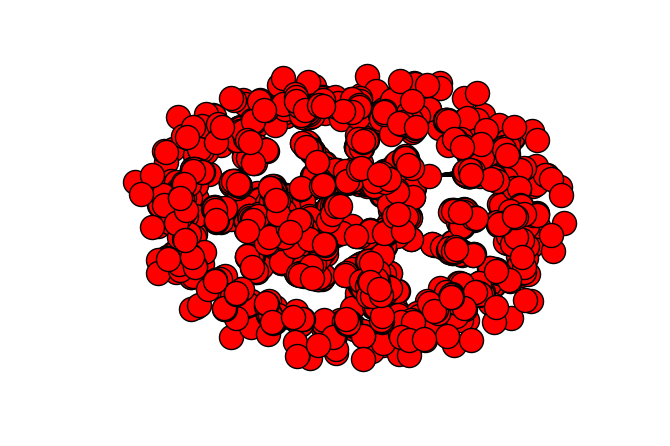

In [101]:
nx.draw(W)
plt.show()

In [91]:
scipy.linalg.expm(A)

array([[ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.]])

In [42]:
bipartite.is_bipartite(G)

True

In [47]:
len(G.nodes())

3955

In [61]:
nodelist = G.nodes()
A = nx.to_numpy_matrix(G, nodelist)

In [64]:
A.shape

(3955, 3955)

In [55]:
for edge in W.edges(data=True): 
    print(edge)

('rhg', 'rve', {'weight': 0.09090909090909091})
('rhg', 'xev', {'weight': 0.09090909090909091})
('rhg', 'coi', {'weight': 0.09090909090909091})
('rhg', 'pym', {'weight': 0.09090909090909091})
('rhg', 'ykq', {'weight': 0.09090909090909091})
('rhg', 'siy', {'weight': 0.09090909090909091})
('rhg', 'foz', {'weight': 0.09090909090909091})
('rhg', 'hsh', {'weight': 0.09090909090909091})
('rhg', 'uyn', {'weight': 0.09090909090909091})
('rhg', 'qwa', {'weight': 0.09090909090909091})
('rhg', 'epj', {'weight': 0.09090909090909091})
('hxm', 'vie', {'weight': 0.1})
('hxm', 'dor', {'weight': 0.225})
('hxm', 'mvo', {'weight': 0.225})
('hxm', 'wbx', {'weight': 1.225})
('hxm', 'qxh', {'weight': 0.225})
('hxm', 'epk', {'weight': 0.125})
('hxm', 'kzj', {'weight': 0.225})
('hxm', 'tri', {'weight': 0.225})
('hxm', 'qck', {'weight': 0.1})
('hxm', 'nzo', {'weight': 0.225})
('hxm', 'wxq', {'weight': 0.1})
('sha', 'yok', {'weight': 0.02857142857142857})
('sha', 'nkq', {'weight': 0.02857142857142857})
('sha', 

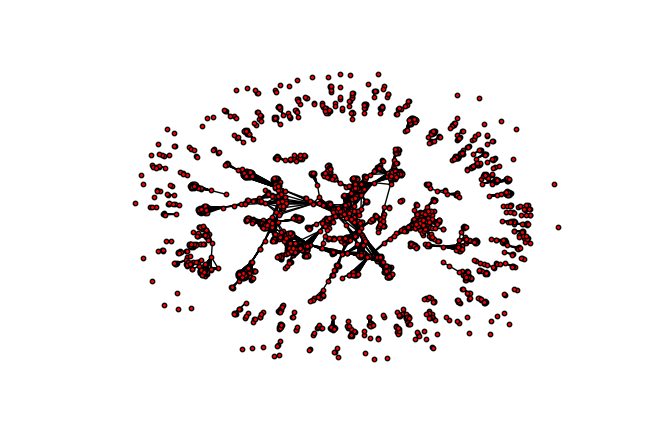

In [135]:
from nxviz import CircosPlot
import matplotlib.pyplot as plt
nx.draw(W,pos=nx.spring_layout(W),with_labels =False,node_size = 10)#,font_size = 2 ) 
plt.show()

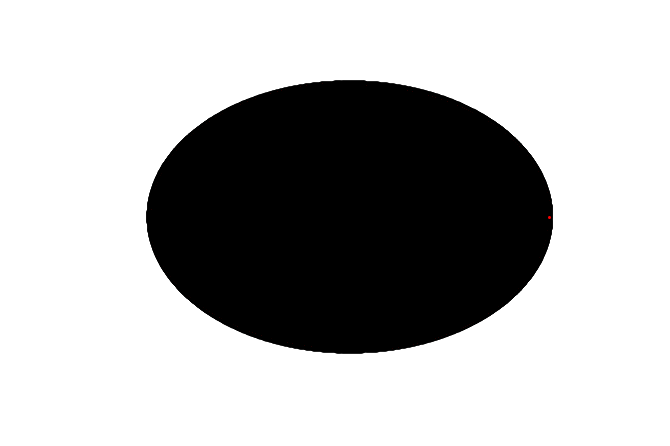

In [136]:
nx.draw(W,pos=nx.shell_layout(W),with_labels =False,node_size = 10)#,font_size = 2 ) 
plt.show()

## Daily network

In [ ]:
n = 0
for i in set(data['Month, Day, Year of Date'].tolist()):
    dataset = data[data['Month, Day, Year of Date']==i]
    g = nx.Graph()
    for i,v in zip(dataset['Worker_refined'],dataset['repo_refined']):
        g.add_edge(i,v)
    w = bipartite.collaboration_weighted_projected_graph(g, dataset['Worker_refined'])
    nx.draw(W,pos=nx.spectral_layout(W),with_labels =False,node_size = 10)#,font_size = 2 ) 
    plt.show(figsize = (3,3))
    n  +=1
    if n>4:
        break

In [157]:
dense_list = []
for i in set(data['Month, Day, Year of Date'].tolist()):
    dataset = data[data['Month, Day, Year of Date']==i]
    g = nx.Graph()
    for i,v in zip(dataset['Worker_refined'],dataset['repo_refined']):
        g.add_edge(i,v)
    w = bipartite.collaboration_weighted_projected_graph(g, dataset['Worker_refined'])
    dense_list.append(nx.density(w))

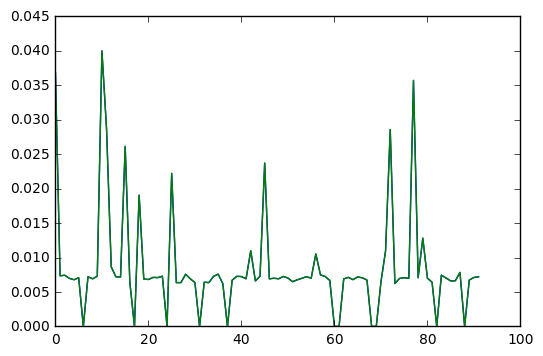

In [160]:
plt.plot(dense_list)
plt.show()

In [149]:
nx.density(W)

0.010154822241803824